# Building the Car of the Future

In the US, a car-dependent country, due to rising fuel costs, consumers prefer fuel efficient cars. A car manufacturer famous for making large automobiles is struggling with sales and plans to introduce a fuel-efficient model to increase its top line. We will analyze data from existing cars in the market and make recommendations to design a car with higher gas mileage.

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df_orig = pd.read_csv('week2-car.csv')
df_orig.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


# Part 1: Data Cleansing

In [3]:
df_orig.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object

In [4]:
for col in df_orig.iloc[:,[3,6,7]]:
    print(col,df_orig[col].unique())

Horsepower ['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']
Model Year [70 71 72 73 74 75 76 77 78 79 80 81 82]
US Made [1 0]


## Data Manipulation

In [5]:
df=df_orig.rename(columns={'Model Year':'ModelYear','US Made':'USMade'})
df=df.replace('?',np.nan)
df.Horsepower = pd.to_numeric(df.Horsepower)
df.ModelYear = df.ModelYear+1900

## Missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   ModelYear     398 non-null    int64  
 7   USMade        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


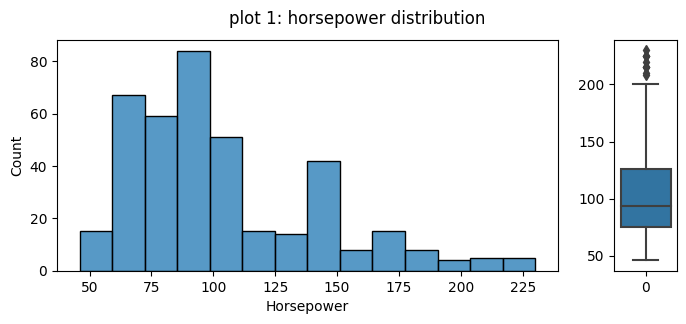

In [7]:
fig, axs = plt.subplots(1,2,figsize=(8,3),gridspec_kw={"width_ratios": (8, 1)})
fig.suptitle('plot 1: horsepower distribution')
sns.histplot(ax=axs[0], data=df.Horsepower)
sns.boxplot(ax=axs[1], data=df.Horsepower)
plt.show()

In [8]:
df.Horsepower.median()

93.5

### Replacing missing horsepower with median

In [9]:
df.Horsepower = df.Horsepower.fillna(df.Horsepower.median())

## Detecting analmolies

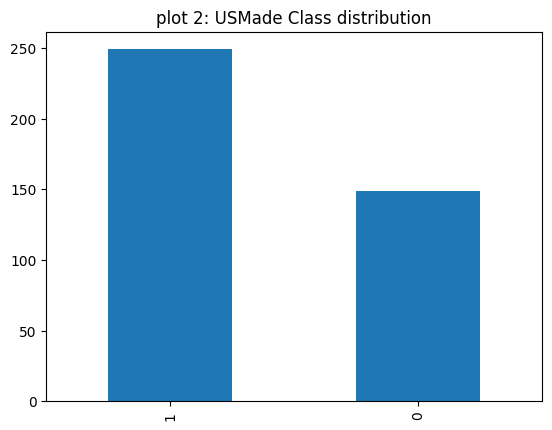

In [10]:
df.USMade.value_counts(sort=False).plot.bar(title='plot 2: USMade Class distribution');

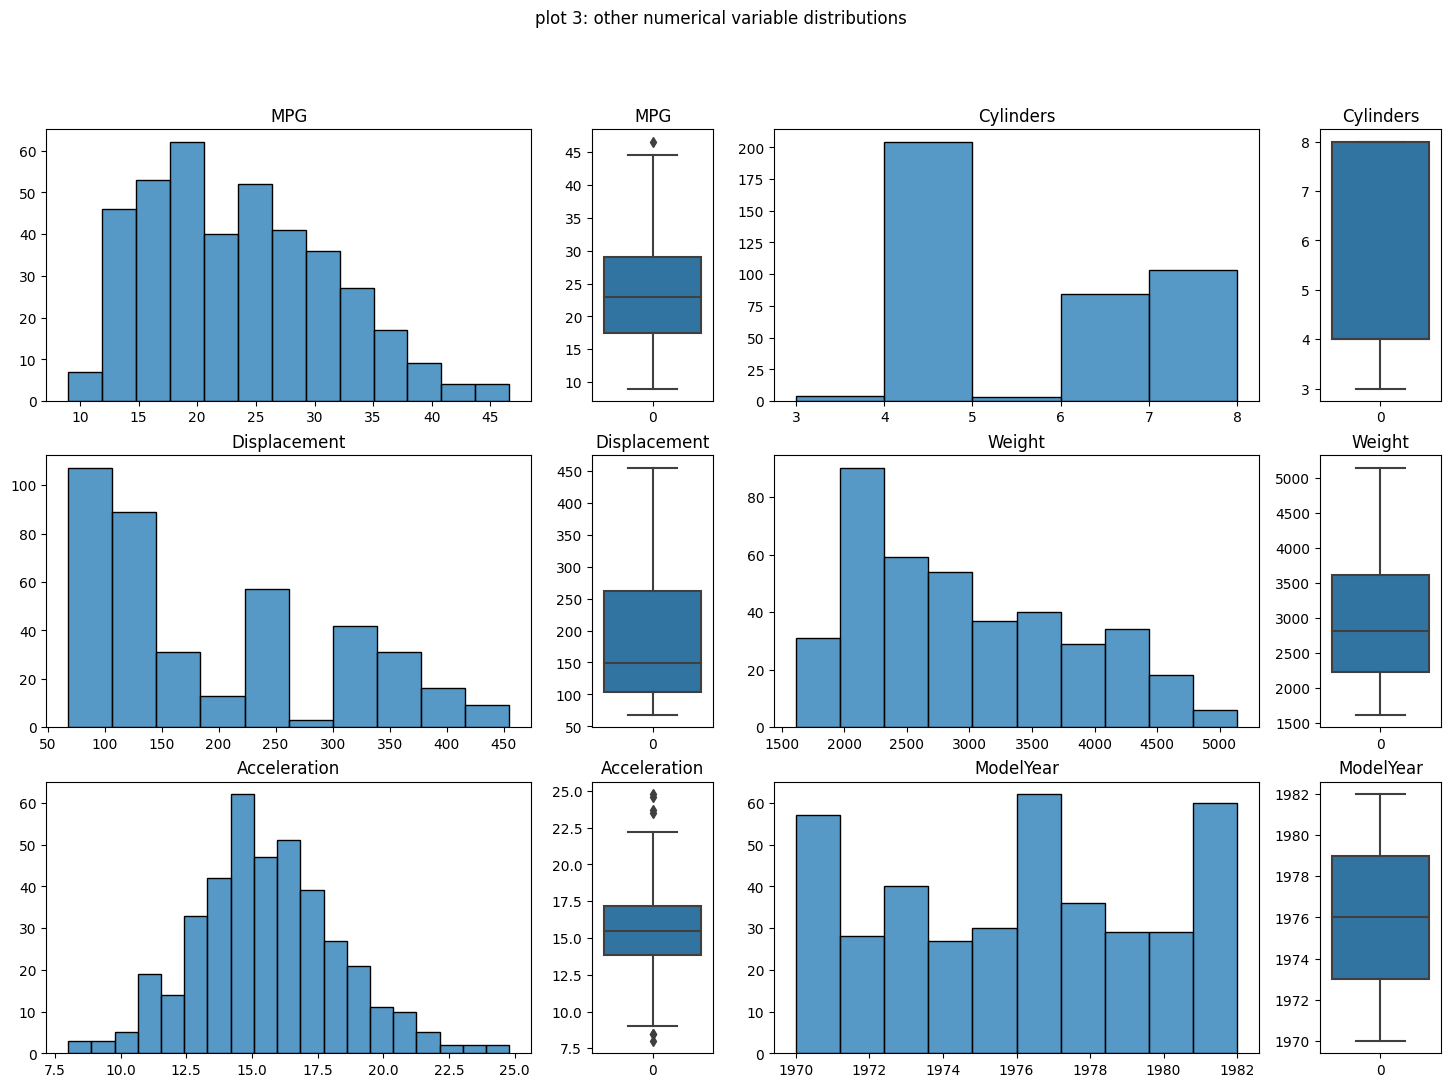

In [11]:
fig, axs = plt.subplots(3,4,figsize=(18,12),gridspec_kw={"width_ratios": (8,2,8,2)})
fig.suptitle('plot 3: other numerical variable distributions')
sns.histplot(ax=axs[0,0],data=df.MPG).set(xlabel=None,ylabel=None,title='MPG')
sns.boxplot(ax=axs[0,1],data=df.MPG).set(xlabel=None,ylabel=None,title='MPG')
sns.histplot(ax=axs[0,2],data=df.Cylinders,bins=5).set(xlabel=None,ylabel=None,title='Cylinders')
sns.boxplot(ax=axs[0,3],data=df.Cylinders).set(xlabel=None,ylabel=None,title='Cylinders')
sns.histplot(ax=axs[1,0],data=df.Displacement).set(xlabel=None,ylabel=None,title='Displacement')
sns.boxplot(ax=axs[1,1],data=df.Displacement).set(xlabel=None,ylabel=None,title='Displacement')
sns.histplot(ax=axs[1,2],data=df.Weight).set(xlabel=None,ylabel=None,title='Weight')
sns.boxplot(ax=axs[1,3],data=df.Weight).set(xlabel=None,ylabel=None,title='Weight')
sns.histplot(ax=axs[2,0],data=df.Acceleration).set(xlabel=None,ylabel=None,title='Acceleration')
sns.boxplot(ax=axs[2,1],data=df.Acceleration).set(xlabel=None,ylabel=None,title='Acceleration')
sns.histplot(ax=axs[2,2],data=df.ModelYear).set(xlabel=None,ylabel=None,title='ModelYear')
sns.boxplot(ax=axs[2,3],data=df.ModelYear).set(xlabel=None,ylabel=None,title='ModelYear')
plt.show()

## EDA

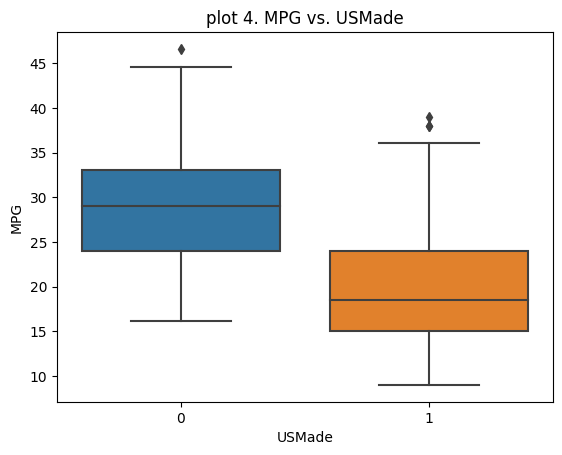

In [12]:
sns.boxplot(x=df.USMade,y=df.MPG).set(title='plot 4. MPG vs. USMade');

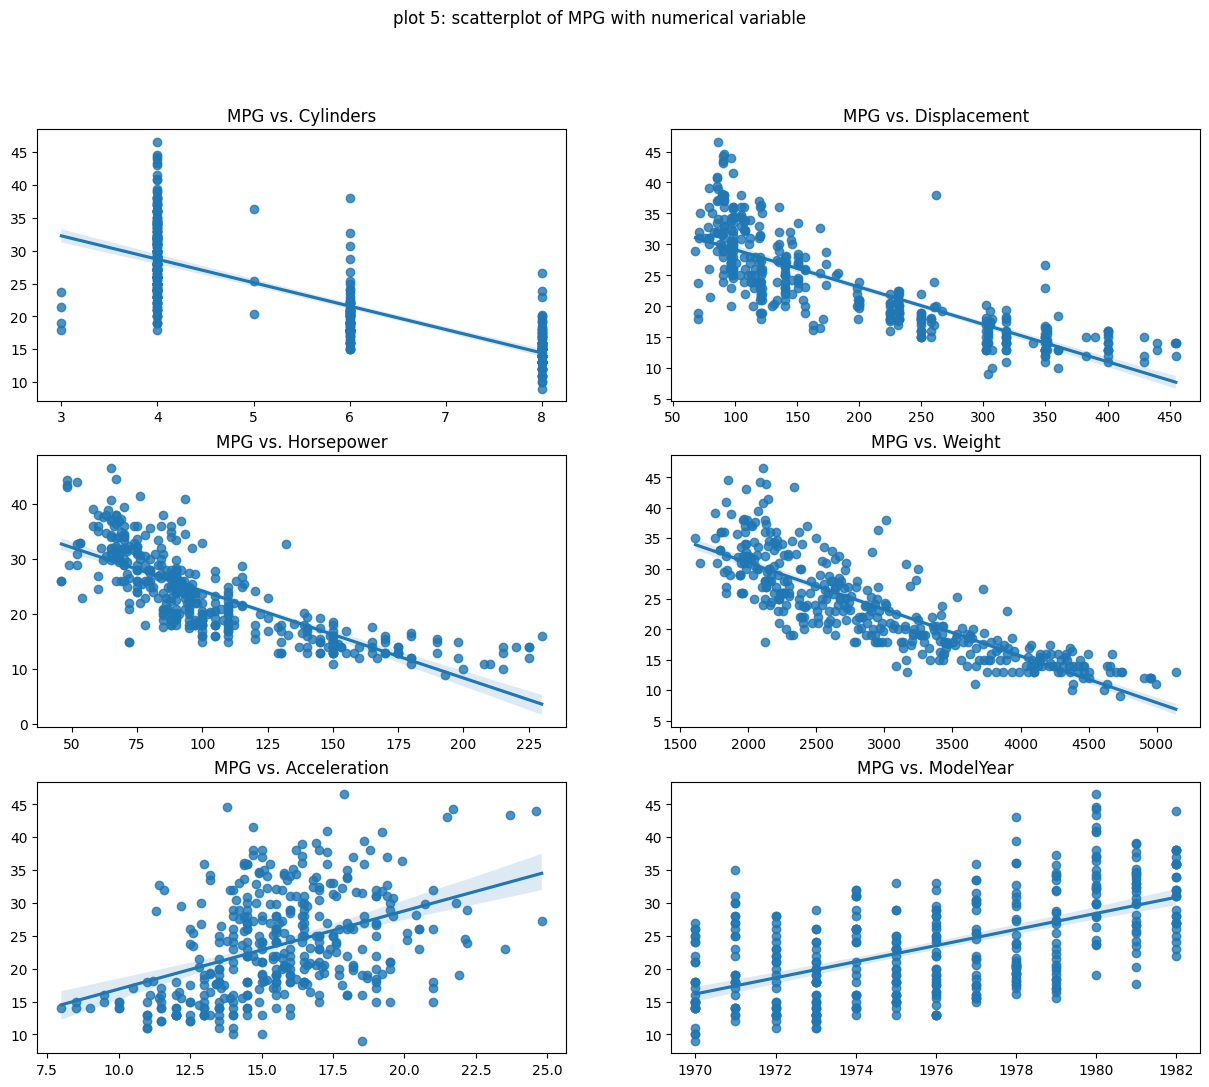

In [13]:
fig, axs = plt.subplots(3,2,figsize=(15,12))
fig.suptitle('plot 5: scatterplot of MPG with numerical variable')
sns.regplot(ax=axs[0,0],x=df.Cylinders,y=df.MPG).set(xlabel=None,ylabel=None,title='MPG vs. Cylinders')
sns.regplot(ax=axs[0,1],x=df.Displacement,y=df.MPG).set(xlabel=None,ylabel=None,title='MPG vs. Displacement')
sns.regplot(ax=axs[1,0],x=df.Horsepower,y=df.MPG).set(xlabel=None,ylabel=None,title='MPG vs. Horsepower')
sns.regplot(ax=axs[1,1],x=df.Weight,y=df.MPG).set(xlabel=None,ylabel=None,title='MPG vs. Weight')
sns.regplot(ax=axs[2,0],x=df.Acceleration,y=df.MPG).set(xlabel=None,ylabel=None,title='MPG vs. Acceleration')
sns.regplot(ax=axs[2,1],x=df.ModelYear,y=df.MPG).set(xlabel=None,ylabel=None,title='MPG vs. ModelYear')
plt.show()

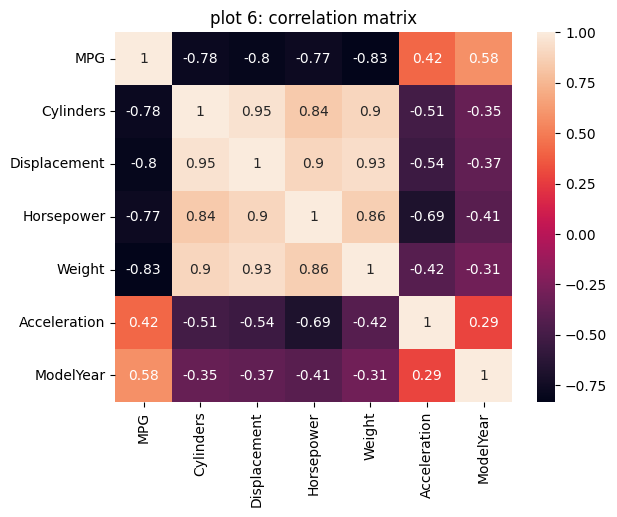

In [14]:
sns.heatmap(data=df.iloc[:,0:7].corr(),annot=True).set(title='plot 6: correlation matrix');

# Part 2: Linear Regression

In [15]:
x = df.iloc[:,1:8]
y = df.MPG
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [16]:
x_train2 = sm.add_constant(x_train[['Cylinders','Displacement','Horsepower','Weight','Acceleration','ModelYear','USMade']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     221.4
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          1.47e-116
Time:                        04:04:10   Log-Likelihood:                -821.39
No. Observations:                 318   AIC:                             1659.
Df Residuals:                     310   BIC:                             1689.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1518.2485    110.527    -13.736   

In [17]:
x_train2 = sm.add_constant(x_train[['Displacement','Weight','Acceleration','ModelYear','USMade']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          1.10e-118
Time:                        04:04:10   Log-Likelihood:                -822.26
No. Observations:                 318   AIC:                             1657.
Df Residuals:                     312   BIC:                             1679.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1508.9778    107.167    -14.081   

In [18]:
x_train2 = sm.add_constant(x_train[['Weight','ModelYear','USMade']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     499.7
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          3.64e-119
Time:                        04:04:10   Log-Likelihood:                -827.48
No. Observations:                 318   AIC:                             1663.
Df Residuals:                     314   BIC:                             1678.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1468.7380    104.809    -14.013      0.0

# Part 3. Selection Techniques

In [19]:
# All variables backward selection
x_train2 = sm.add_constant(x_train[['Displacement','Weight','Acceleration','ModelYear','USMade']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          1.10e-118
Time:                        04:04:10   Log-Likelihood:                -822.26
No. Observations:                 318   AIC:                             1657.
Df Residuals:                     312   BIC:                             1679.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1508.9778    107.167    -14.081   

In [20]:
# All variables forward selection
x_train2 = sm.add_constant(x_train[['Weight','ModelYear','USMade','Displacement','Acceleration']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          1.10e-118
Time:                        04:04:10   Log-Likelihood:                -822.26
No. Observations:                 318   AIC:                             1657.
Df Residuals:                     312   BIC:                             1679.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1508.9778    107.167    -14.081   

In [21]:
# Backward selection excluding ModelYear
x_train2 = sm.add_constant(x_train[['Weight','USMade','Acceleration']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     269.4
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.70e-86
Time:                        04:04:10   Log-Likelihood:                -903.73
No. Observations:                 318   AIC:                             1815.
Df Residuals:                     314   BIC:                             1831.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.4119      2.102     18.752   

In [22]:
# Backward selection excluding ModelYear and USMade
x_train2 = sm.add_constant(x_train[['Horsepower','Weight']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     378.0
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.96e-84
Time:                        04:04:10   Log-Likelihood:                -911.67
No. Observations:                 318   AIC:                             1829.
Df Residuals:                     315   BIC:                             1841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8413      0.886     51.723      0.0

### Considering Multicollinearity

In [23]:
vif = pd.DataFrame()
dftmp = df[['Cylinders','Displacement','Horsepower','Weight','Acceleration','ModelYear','USMade']]
vif["features"] = dftmp.columns
vif["vif_factor"] = [variance_inflation_factor(dftmp.values, i) for i in range(dftmp.shape[1])]
vif

,features,vif_factor
0,Cylinders,120.641564
1,Displacement,101.278406
2,Horsepower,76.401695
3,Weight,136.141881
4,Acceleration,83.416069
5,ModelYear,154.311870
6,USMade,5.114886


In [24]:
vif = pd.DataFrame()
dftmp = df[['Displacement','Acceleration','USMade']]
vif["features"] = dftmp.columns
vif["vif_factor"] = [variance_inflation_factor(dftmp.values, i) for i in range(dftmp.shape[1])]
vif

,features,vif_factor
0,Displacement,6.253506
1,Acceleration,3.111586
2,USMade,4.666807


In [25]:
x_train2 = sm.add_constant(x_train[['Displacement','Acceleration','USMade']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     216.8
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           3.64e-76
Time:                        04:04:10   Log-Likelihood:                -927.85
No. Observations:                 318   AIC:                             1864.
Df Residuals:                     314   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.3661      2.138     16.071   

In [26]:
vif = pd.DataFrame()
dftmp = df[['Displacement','USMade']]
vif["features"] = dftmp.columns
vif["vif_factor"] = [variance_inflation_factor(dftmp.values, i) for i in range(dftmp.shape[1])]
vif

,features,vif_factor
0,Displacement,4.627679
1,USMade,4.627679


In [27]:
x_train2 = sm.add_constant(x_train[['Displacement','USMade']])
model = sm.OLS(y_train,x_train2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     325.8
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           2.06e-77
Time:                        04:04:10   Log-Likelihood:                -928.00
No. Observations:                 318   AIC:                             1862.
Df Residuals:                     315   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.4838      0.537     66.119   

# Conclusion

Data from 398 existing models were analyzed to understand how car specifications impact its fuel economy. Domain knowledge and data correlation suggest that features like acceleration, horsepower, displacement, and weight are highly interdependent and cannot be considered in silos when designing a new car.

A simple model with five inputs of Displacement, Weight, Acceleration, Model Year, and US Made was built that can be used to predict MPG with an excellent coefficient of determination of 83%. Regarding attributes most impacting gas mileage, it can be said engines with lower displacement have higher fuel efficiency. However, lower displacement is also wellcorrelated with lower cylinders, lower horsepower and lower weight, indicating that a small and 
less powerful car will have higher fuel efficiency in general. Designing a small car may not be business as usual for this manufacturer, known for making large automobiles, and may need significant research. A dataset with more attributes is required to provide further detailed recommendations.

It is also notable that non-US-made cars have higher fuel efficiency. Assuming that this particular manufacturer is US-based, this attribute is not in control. However, further research needs to be done on why Japanese cars are more fuel efficient. It could be due to technological advancements such as regenerative braking, hybrid technology, improved aerodynamics etc. Adopting such technology through research and development can improve the fuel efficiency of its vehicles, albeit over the long term.
